# Hypergraph information

In [5]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

sb.set_theme(style="ticks", context="paper")

In [6]:
results_dir = "../results/"
out_dir = f"{results_dir}datasets/"

## hypergraph datasets

In [7]:
data_names = [
    "email-enron",
    "email-eu",
    "hospital-lyon",
    "contact-high-school",
    "contact-primary-school",
    "tags-ask-ubuntu",
    "congress-bills",
    # "disgenenet",
    # "diseasome",
    # "ndc-substances",
    # "coauth-mag-geology",
    # "coauth-mag-history",
]

HGs = {}
for name in tqdm(data_names):
    HGs[name] = xgi.load_xgi_data(name, max_order=None, cache=True)

100%|█████████████████████████████████████████████| 7/7 [00:07<00:00,  1.07s/it]


In [8]:
pacs = 2
name = f"PACS{pacs}"
H0 = xgi.read_json(f"../data/{name}.json")
print(H0)
orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

Unnamed Hypergraph with 55549 nodes and 33959 hyperedges


### Compute info

In [75]:
i = 5  # choose dataset here
name = data_names[i]
print(name)
H0 = HGs[name]
print(H0)
print("max order:", xgi.max_edge_order(H0))
H0.cleanup(isolates=True)
print(H0)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

tags-ask-ubuntu
Hypergraph named tags-ask-ubuntu with 3029 nodes and 271233 hyperedges
max order: 4
Hypergraph named tags-ask-ubuntu with 3029 nodes and 145053 hyperedges


In [71]:
tau_c = find_charact_tau(H0, orders, weights)
tau_c

0.010675895803301114

### Multiple taus

In [72]:
factors = np.array([1e-2, 1e0, 1e2])
taus = factors * tau_c  # [0.0001, 0.001, 1]

Ds_H = []
lZs_H = []
Qs_H = []

for tau in tqdm(taus):
    print(tau)
    Ds_Hi, lZs_Hi, orders = compute_information(H0, tau)
    Ds_H.append(Ds_Hi)
    lZs_H.append(lZs_Hi)
    Qs_H.append(lZs_Hi + Ds_Hi)

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.00010675895803301114
logm result may be inaccurate, approximate err = 3.3032890764944413e-13
logm result may be inaccurate, approximate err = 3.794931462453367e-13
logm result may be inaccurate, approximate err = 3.3032890764944413e-13
logm result may be inaccurate, approximate err = 3.6380442947607493e-13
logm result may be inaccurate, approximate err = 3.3032890764944413e-13
logm result may be inaccurate, approximate err = 3.8892274577446274e-13
logm result may be inaccurate, approximate err = 3.3032890764944413e-13
logm result may be inaccurate, approximate err = 3.3032890764944413e-13


 33%|███████████████                              | 1/3 [00:08<00:17,  8.60s/it]

0.010675895803301114
logm result may be inaccurate, approximate err = 3.4255980241892677e-13
logm result may be inaccurate, approximate err = 3.795619899111518e-13
logm result may be inaccurate, approximate err = 3.4255980241892677e-13
logm result may be inaccurate, approximate err = 3.5432712745917183e-13
logm result may be inaccurate, approximate err = 3.4255980241892677e-13
logm result may be inaccurate, approximate err = 3.984814878976104e-13
logm result may be inaccurate, approximate err = 3.4255980241892677e-13
logm result may be inaccurate, approximate err = 3.4255980241892677e-13


 67%|██████████████████████████████               | 2/3 [00:17<00:08,  8.64s/it]

1.0675895803301114


100%|█████████████████████████████████████████████| 3/3 [00:27<00:00,  9.02s/it]


In [73]:
np.savez(
    f"{out_dir}taus_{name}_factors_{factors}.npz",
    Ds_H=Ds_H,
    lZs_H=lZs_H,
    Qs_H=Qs_H,
    taus=taus,
    orders=orders,
    tau_c=tau_c,
)

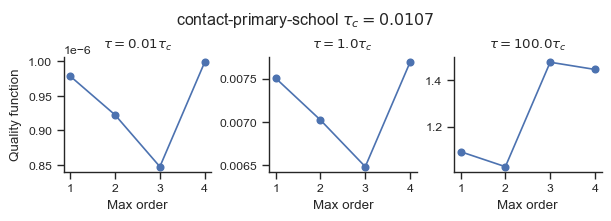

In [74]:
fig, axs = plt.subplots(
    1, len(taus), figsize=(2 * len(taus), 2.1), constrained_layout=True
)

for i, tau in enumerate(taus):

    axs[i].plot(orders, lZs_H[i] + Ds_H[i], "o-", label=f"tau={tau}")

    # axs[i].axvline(d_shuffles[j], ls="--", c=f"C{j+1}", zorder=-2, alpha=0.8)

    axs[i].set_title(rf"$\tau = {factors[i]} \tau_c$", weight="bold")
    axs[i].set_xlabel("Max order")
    # axs[i].set_xticks(orders)

axs[0].set_ylabel("Quality function")
# axs[-1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

sb.despine()

fig.suptitle(rf"{name} $\tau_c={tau_c:.4f}$")

fig_name = f"taus_{name}_factors_{factors}"  # lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"
# fig_name

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")